In [1]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import time

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA


In [4]:
# Imports data
X = pd.read_csv('x.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
y = pd.read_csv('y.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
y = y.iloc[:,0]

In [8]:
X

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-01-04,0.373032,0.275060,0.083938,0.664201,0.601652,0.769184,0.748975,0.760298,0.940532,1.843950,...,-0.215571,0.077728,0.083014,-0.583570,0.175899,1.2,3.714687,-0.584329,0.134978,16.1885
1992-01-05,0.532885,0.549297,0.514589,-0.873850,0.546742,0.324748,0.546363,0.580914,0.647050,3.074505,...,0.097556,-0.255295,-0.251432,-0.072648,-0.088998,2.0,-5.294144,0.020679,0.410802,14.7280
1992-01-06,0.417254,0.444719,0.269590,1.048664,0.280383,0.059695,-0.239920,-0.304895,-0.484071,-1.398611,...,0.318864,0.023712,0.250035,0.795664,-0.088298,1.2,4.562073,0.881246,-0.087417,14.7531
1992-01-07,-0.079646,-0.134642,0.334203,1.330298,0.708002,0.893837,0.995847,1.126762,1.294361,2.614598,...,-0.233369,0.264845,-0.416910,-1.518733,-0.000307,-3.8,-0.352309,-0.854378,0.216749,13.3036
1992-01-08,0.386454,0.380539,0.246840,-1.603560,0.324124,-0.549192,-0.106279,-0.111965,0.036867,-0.863906,...,-0.032213,-0.285966,0.499100,1.157537,0.086992,-0.5,-0.633643,1.163376,0.042164,14.4223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,-0.013781,-0.019171,-0.193846,1.490076,-0.719328,-1.550613,-1.202485,-0.846966,-0.623823,-1.031771,...,-0.613838,0.175427,-0.107940,0.300155,-0.590025,2.9,-0.283245,-0.123254,0.880929,21.7702
2023-01-01,0.087570,0.130699,1.316033,0.190398,2.764501,1.003181,0.343776,-0.014901,-0.334291,0.217564,...,1.425376,0.033243,0.170724,-0.004386,0.309575,5.2,0.071035,0.049043,-0.142513,20.2269
2023-01-02,0.103913,-0.004103,-0.028459,-0.417590,-0.660515,-0.005561,-0.196666,-0.129562,0.097723,0.212525,...,-0.416042,-0.224790,-0.417543,-0.152983,-0.621376,2.1,-0.237727,-0.068985,-0.121427,20.2141


# Principal Component Analysis (PCA)

In [6]:
steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
           ('pca', PCA(n_components = 1, random_state=1))]

pl_pca_X = Pipeline(steps_X)

X_pca_model = pl_pca_X.fit(X)

print('n_components:', 1, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())

X_pca = X_pca_model.transform(X)

n_components: 1    variance explained: 0.223


In [10]:
for n_comp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,50,127]:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]
    
    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(X)
    
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())


n_components: 1    variance explained: 0.223
n_components: 2    variance explained: 0.313
n_components: 3    variance explained: 0.390
n_components: 4    variance explained: 0.450
n_components: 5    variance explained: 0.491
n_components: 6    variance explained: 0.527
n_components: 7    variance explained: 0.555
n_components: 8    variance explained: 0.580
n_components: 9    variance explained: 0.602
n_components: 10    variance explained: 0.623
n_components: 11    variance explained: 0.643
n_components: 12    variance explained: 0.661
n_components: 13    variance explained: 0.678
n_components: 14    variance explained: 0.695
n_components: 15    variance explained: 0.710
n_components: 16    variance explained: 0.723
n_components: 17    variance explained: 0.737
n_components: 18    variance explained: 0.749
n_components: 19    variance explained: 0.761
n_components: 20    variance explained: 0.773
n_components: 21    variance explained: 0.784
n_components: 22    variance explained: 0.7

In [11]:
n_train = int(len(X)*0.7)  
n_records = len(X)
n_forecast = n_records-n_train

j = 0
for i in range(n_train, n_records):    
    #train, test = X[0:i], X[i:i+1]   #expanding window
    train, test = X[j:i], X[i:i+1]   #rolling window
    print('train=%d, test=%d' % (len(train), len(test)))
    j += 1

train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261, test=1
train=261,

# Grid Search for Optimal Hyperparameters

In [12]:
# pipeline
def pipeline(config):

    # unpack config
    n_comps = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components = n_comps, random_state=1)),
             ('ols', LinearRegression())
            ]

    pipeline = Pipeline(steps)

    return pipeline

In [13]:
def walk_forward_validation(cfg):
    
    n_train = int(len(X)*0.7)  

    n_records = len(X)

    y_test_list = []
    
    y_pred_list = []

    j = 0

    for i in range(n_train, n_records):
    
        X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)        
    
        y_pred = model.predict(X_test)
    
        y_pred_list.extend(y_pred)
    
        y_test_list.extend(y_test)

        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [14]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [18]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1], reverse=True)
    return scores

In [19]:
# create a list of configs to try
def model_configs():
    # define scope of configs
      
    n_comps = [11,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,50,127]
     
    # create configs
    configs = list()
    
    for k in n_comps:
        cfg = k
        configs.append(cfg)

    print('Total configs: %d' % len(configs))
    return configs

In [20]:
# model configs
cfg_list = model_configs()

Total configs: 32


In [21]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 32
 > 0.278
> Model[11] 0.278
 > 0.359
> Model[2] 0.359
 > 0.336
> Model[3] 0.336
 > 0.312
> Model[4] 0.312
 > 0.306
> Model[5] 0.306
 > 0.311
> Model[6] 0.311
 > 0.316
> Model[7] 0.316
 > 0.322
> Model[8] 0.322
 > 0.302
> Model[9] 0.302
 > 0.298
> Model[10] 0.298
 > 0.278
> Model[11] 0.278
 > 0.274
> Model[12] 0.274
 > 0.274
> Model[13] 0.274
 > 0.265
> Model[14] 0.265
 > 0.268
> Model[15] 0.268
 > 0.275
> Model[16] 0.275
 > 0.271
> Model[17] 0.271
 > 0.265
> Model[18] 0.265
 > 0.261
> Model[19] 0.261
 > 0.261
> Model[20] 0.261
 > 0.266
> Model[21] 0.266
 > 0.269
> Model[22] 0.269
 > 0.269
> Model[23] 0.269
 > 0.267
> Model[24] 0.267
 > 0.265
> Model[25] 0.265
 > 0.271
> Model[26] 0.271
 > 0.272
> Model[27] 0.272
 > 0.272
> Model[28] 0.272
 > 0.277
> Model[29] 0.277
 > 0.282
> Model[30] 0.282
 > 0.336
> Model[50] 0.336
 > 0.686
> Model[127] 0.686
done


In [22]:
scores

[('127', 0.6859921399468725),
 ('2', 0.3585406853519535),
 ('3', 0.33603731311985774),
 ('50', 0.3359637609139022),
 ('8', 0.32164665350267446),
 ('7', 0.31637021243661356),
 ('4', 0.31160057481765385),
 ('6', 0.31092079018374114),
 ('5', 0.30628849641343736),
 ('9', 0.3016026482626886),
 ('10', 0.29759633347946907),
 ('30', 0.2816258606568096),
 ('11', 0.27765443809321666),
 ('11', 0.27765443809321666),
 ('29', 0.27695616006848056),
 ('16', 0.27453448043863116),
 ('12', 0.27383351989830346),
 ('13', 0.27364598026953857),
 ('28', 0.2719717518819438),
 ('27', 0.27190922792682387),
 ('17', 0.27135894078248957),
 ('26', 0.2712192073028395),
 ('23', 0.2693376067125602),
 ('22', 0.26907683020333795),
 ('15', 0.26758446482759746),
 ('24', 0.26652566703353536),
 ('21', 0.26550020960735526),
 ('25', 0.2654432620168183),
 ('14', 0.26499413014334866),
 ('18', 0.2648676158862679),
 ('20', 0.26071503177181743),
 ('19', 0.26050258387166764)]

# Linear Regression

In [23]:
# Pipeline

# Steps
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 19, random_state=1)),
               ('ols', LinearRegression())
              ]

pipeline_final = Pipeline(steps_final)

In [24]:
start=time.time()    
   
n_train = int(len(X)*0.7)  

n_records = len(X)

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

Running Time: 1.0086069107055664


In [28]:
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual': y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,0.110017,0.080950
1,0.203997,0.179458
2,0.186245,0.175601
3,0.190120,0.210070
4,0.132026,0.123767
5,0.112485,0.196641
6,-0.016001,0.234136
7,0.007159,0.075470
8,-0.019793,0.177878
9,-0.188443,0.040393


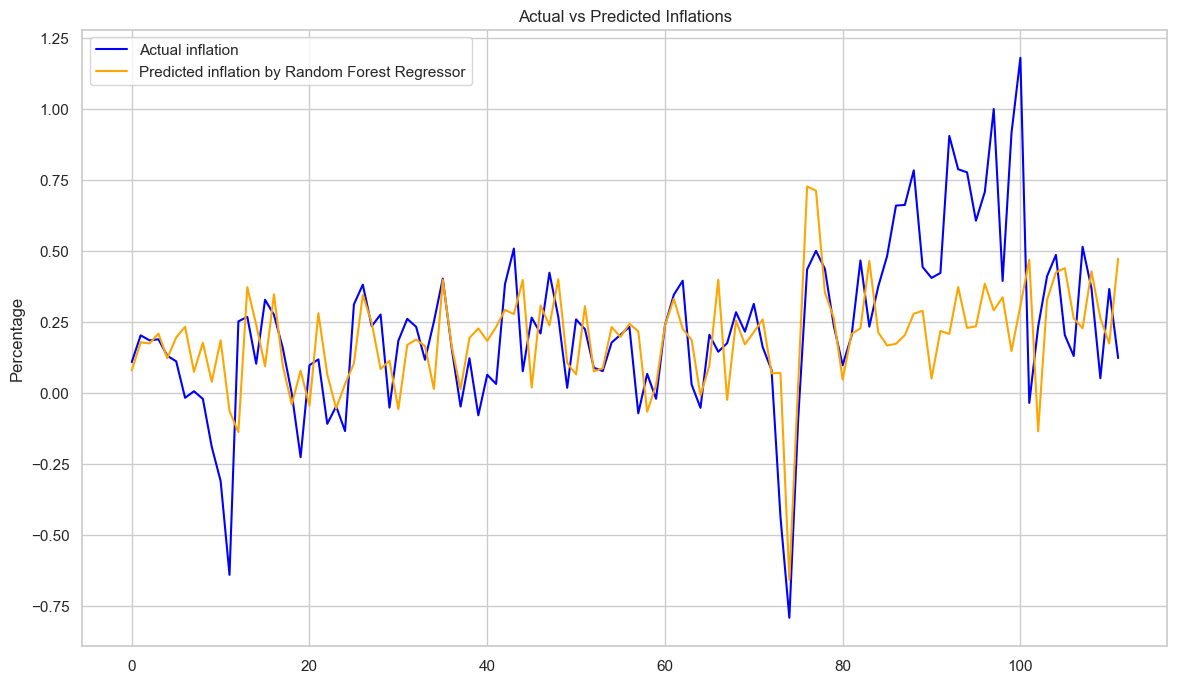

In [30]:

plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='orange', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

MSE: 
0.06786159620381522
RMSE: 
0.26050258387166764
Correlation: 
             Actual  Predicted
Actual     1.000000   0.483438
Predicted  0.483438   1.000000
R2: 
0.20923740083930653


# Elastic Net with grid search

In [161]:
# pipeline
def pipeline(config):

    # unpack config
    n_comps, en_alpha, en_ratio = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components = n_comps, random_state=1)),
             ('elasticnet', ElasticNet(alpha=en_alpha,l1_ratio=en_ratio, tol=0.5))
            ]

    pipeline = Pipeline(steps)

    return pipeline

In [218]:
def walk_forward_validation(cfg):
    
    n_train = int(len(X)*0.7)

    n_records = len(X)

    y_test_list = []
    
    y_pred_list = []

    j = 0

    for i in range(n_train, n_records):
    
        X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)        
    
        y_pred = model.predict(X_test)
    
        y_pred_list.extend(y_pred)
    
        y_test_list.extend(y_test)

        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [219]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [220]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1])
    return scores

In [233]:
# create a list of configs to try
def model_configs():
    # define scope of configs
      
    # n_comps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,50,127]
     
    n_comps = [19]
    
    # en_alpha = [0.0001,0.001,0.01,0.1,1,10]  
    en_alpha = [0.05,0.075,0.1,0.2,0.3,0.4,0.5,1,75]
    
    # en_ratio = [0,0.1,0.2,0.3,0.5,0.75,1]
    en_ratio = [0,0.0001,0.0005,0.001]
    
    
    # create configs
    configs = list()
    for i in n_comps:
        for j in en_alpha:
            for k in en_ratio:
                cfg = [i,j,k]
                configs.append(cfg)

    print('Total configs: %d' % len(configs))
    return configs

In [234]:
cfg_list = model_configs()

Total configs: 36


In [235]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 36
 > 0.260
> Model[[19, 0.05, 0]] 0.260
 > 0.260
> Model[[19, 0.05, 0.0001]] 0.260
 > 0.260
> Model[[19, 0.05, 0.0005]] 0.260
 > 0.260
> Model[[19, 0.05, 0.001]] 0.260
 > 0.260
> Model[[19, 0.075, 0]] 0.260
 > 0.260
> Model[[19, 0.075, 0.0001]] 0.260
 > 0.260
> Model[[19, 0.075, 0.0005]] 0.260
 > 0.260
> Model[[19, 0.075, 0.001]] 0.260
 > 0.260
> Model[[19, 0.1, 0]] 0.260
 > 0.260
> Model[[19, 0.1, 0.0001]] 0.260
 > 0.260
> Model[[19, 0.1, 0.0005]] 0.260
 > 0.260
> Model[[19, 0.1, 0.001]] 0.260
 > 0.260
> Model[[19, 0.2, 0]] 0.260
 > 0.260
> Model[[19, 0.2, 0.0001]] 0.260
 > 0.260
> Model[[19, 0.2, 0.0005]] 0.260
 > 0.260
> Model[[19, 0.2, 0.001]] 0.260
 > 0.259
> Model[[19, 0.3, 0]] 0.259
 > 0.259
> Model[[19, 0.3, 0.0001]] 0.259
 > 0.259
> Model[[19, 0.3, 0.0005]] 0.259
 > 0.259
> Model[[19, 0.3, 0.001]] 0.259
 > 0.259
> Model[[19, 0.4, 0]] 0.259
 > 0.259
> Model[[19, 0.4, 0.0001]] 0.259
 > 0.259
> Model[[19, 0.4, 0.0005]] 0.259
 > 0.259
> Model[[19, 0.4, 0.001]] 0.25

In [236]:
scores

[('[19, 0.4, 0]', 0.25927532748153265),
 ('[19, 0.4, 0.0001]', 0.2592924623583852),
 ('[19, 0.3, 0]', 0.2593140774428595),
 ('[19, 0.3, 0.0001]', 0.25932506015273804),
 ('[19, 0.5, 0]', 0.25935296586930284),
 ('[19, 0.4, 0.0005]', 0.25936192980714207),
 ('[19, 0.3, 0.0005]', 0.259369597084403),
 ('[19, 0.5, 0.0001]', 0.2593769978153099),
 ('[19, 0.3, 0.001]', 0.2594265772738151),
 ('[19, 0.4, 0.001]', 0.2594499121680729),
 ('[19, 0.5, 0.0005]', 0.2594744739813025),
 ('[19, 0.2, 0]', 0.25950189342348257),
 ('[19, 0.2, 0.0001]', 0.25950773106032615),
 ('[19, 0.2, 0.0005]', 0.25953144142677126),
 ('[19, 0.2, 0.001]', 0.2595615852696174),
 ('[19, 0.5, 0.001]', 0.2595977715932355),
 ('[19, 0.1, 0]', 0.2598803378468381),
 ('[19, 0.1, 0.0001]', 0.2598823750580585),
 ('[19, 0.1, 0.0005]', 0.2598906425572527),
 ('[19, 0.1, 0.001]', 0.25990115589419305),
 ('[19, 0.075, 0]', 0.2600106628585005),
 ('[19, 0.075, 0.0001]', 0.26001200769124455),
 ('[19, 0.075, 0.0005]', 0.26001745566845885),
 ('[19, 

In [232]:
#so we find a ridge regression with alpha = 0,4 and 19 components

# Ridge

In [239]:
# Pipeline

# Steps
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 19, random_state=1)),
               ('ridge', Ridge(alpha=0.4))
              ]

pipeline_final = Pipeline(steps_final)

In [240]:
start=time.time()    
   
n_train = int(len(X)*0.7)  

n_records = len(X)

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

Running Time: 0.974860668182373


In [241]:
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual': y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,0.110017,0.081008
1,0.203997,0.179427
2,0.186245,0.175651
3,0.190120,0.210087
4,0.132026,0.123806
5,0.112485,0.196666
6,-0.016001,0.234128
7,0.007159,0.075503
8,-0.019793,0.177892
9,-0.188443,0.040449


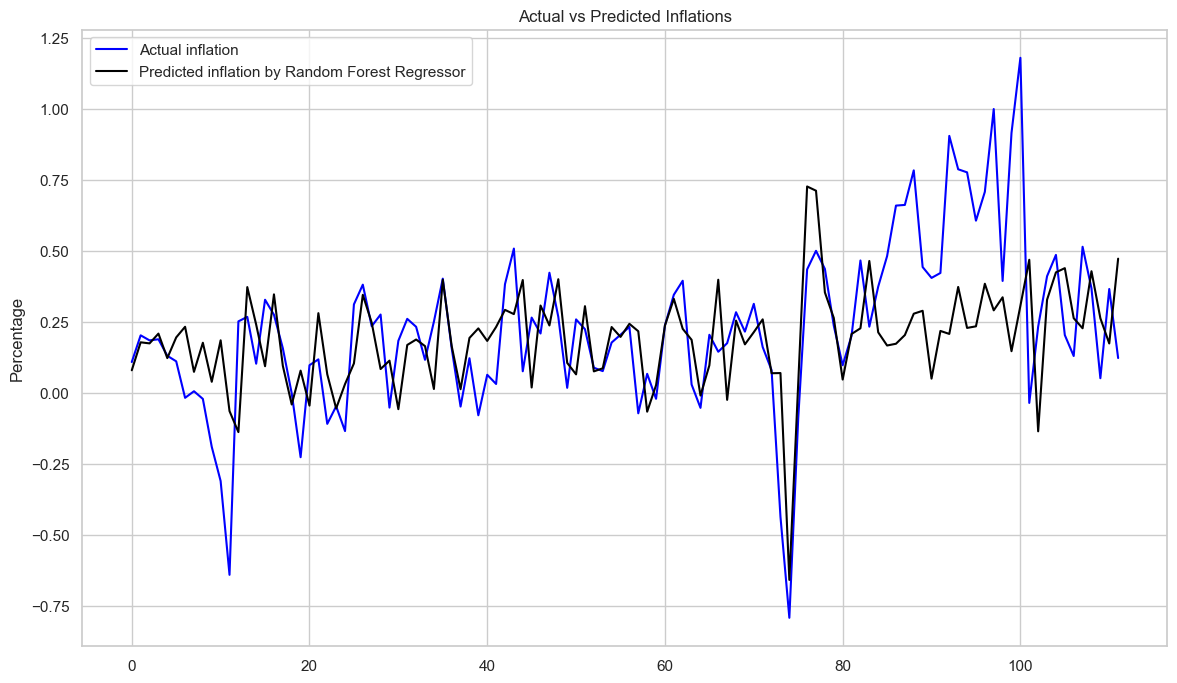

In [244]:
plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='black', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [245]:
print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

MSE: 
0.06785550320965046
RMSE: 
0.26049088891869226
Correlation: 
             Actual  Predicted
Actual     1.000000   0.483482
Predicted  0.483482   1.000000
R2: 
0.20930839993411032
